In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("..\\DATA\\cluster_mpg.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [7]:
df_w_dummies = pd.get_dummies(df.drop('name', axis=1))

In [8]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [9]:
from sklearn.preprocessing import MinMaxScaler 

<font size = 5> Для Иерархической кластеризации лучше применять его. По сути нам это лучше поможет понять какое-максимальное расстояние между точкам.

In [10]:
scaler = MinMaxScaler()

In [11]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [12]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [14]:
scaled_df = pd.DataFrame(scaled_data, columns=df_w_dummies.columns)

In [15]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<AxesSubplot:>

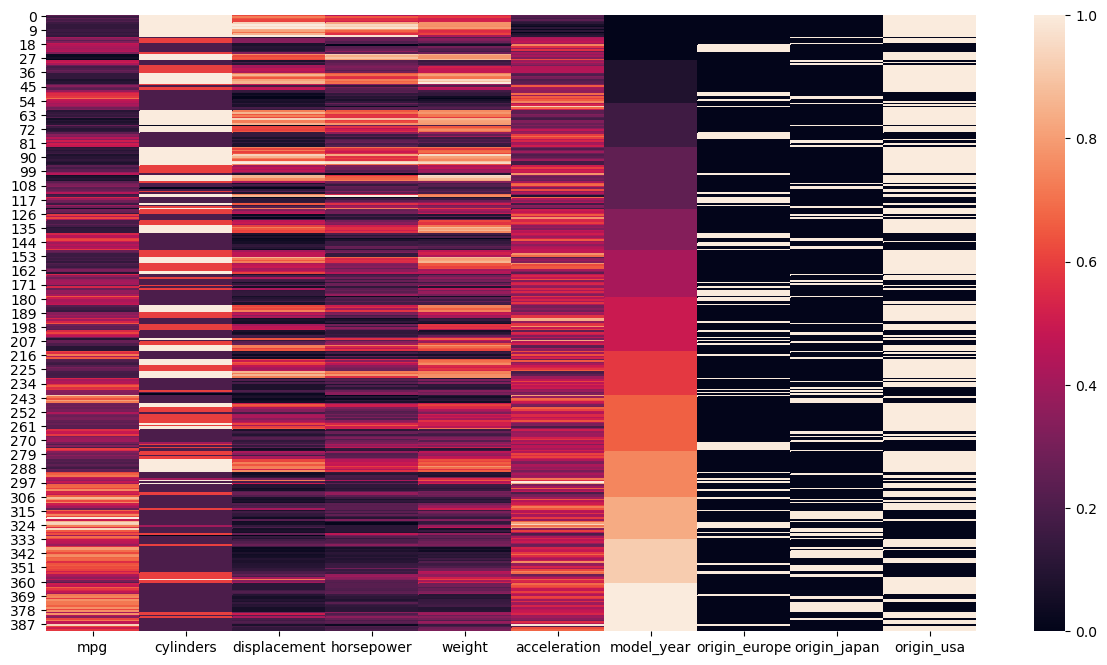

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df)

<font size = 5> Каждая строка - отдельный автомобиль 

<Figure size 1500x800 with 0 Axes>

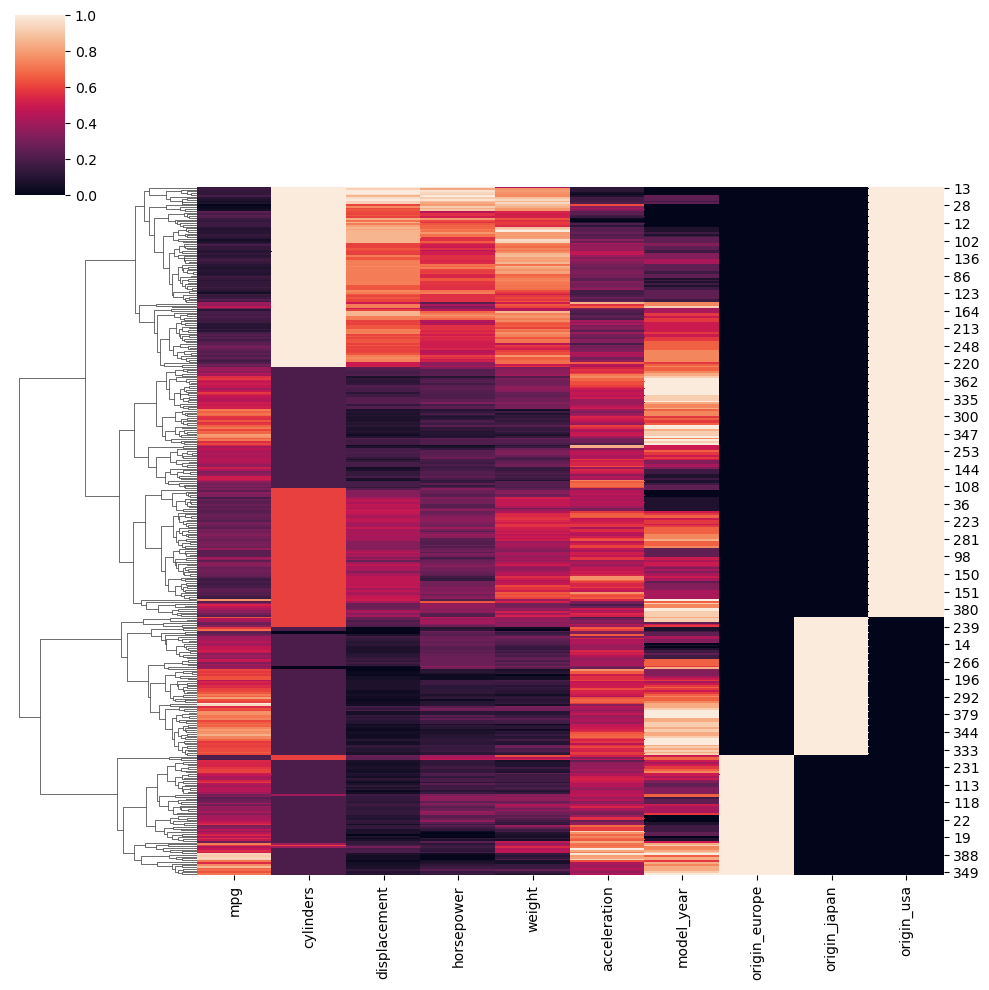

In [21]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df, col_cluster=False)

<AxesSubplot:>

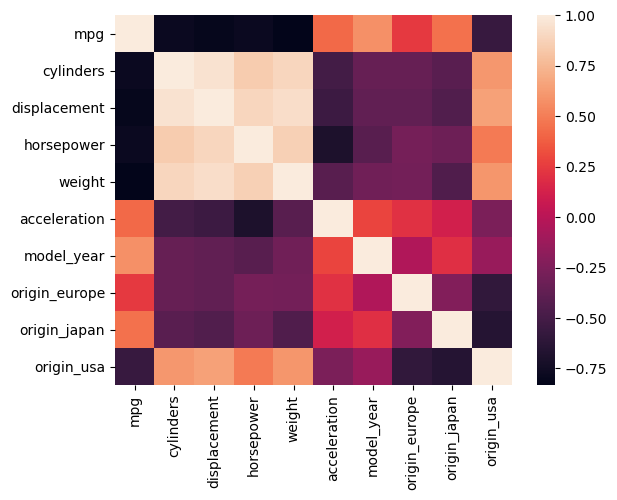

In [23]:
sns.heatmap(scaled_df.corr())

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
model = AgglomerativeClustering(n_clusters=3)

In [39]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


In [40]:
cluster_labels = model.fit_predict(scaled_df)

In [41]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0,

<AxesSubplot:xlabel='mpg', ylabel='weight'>

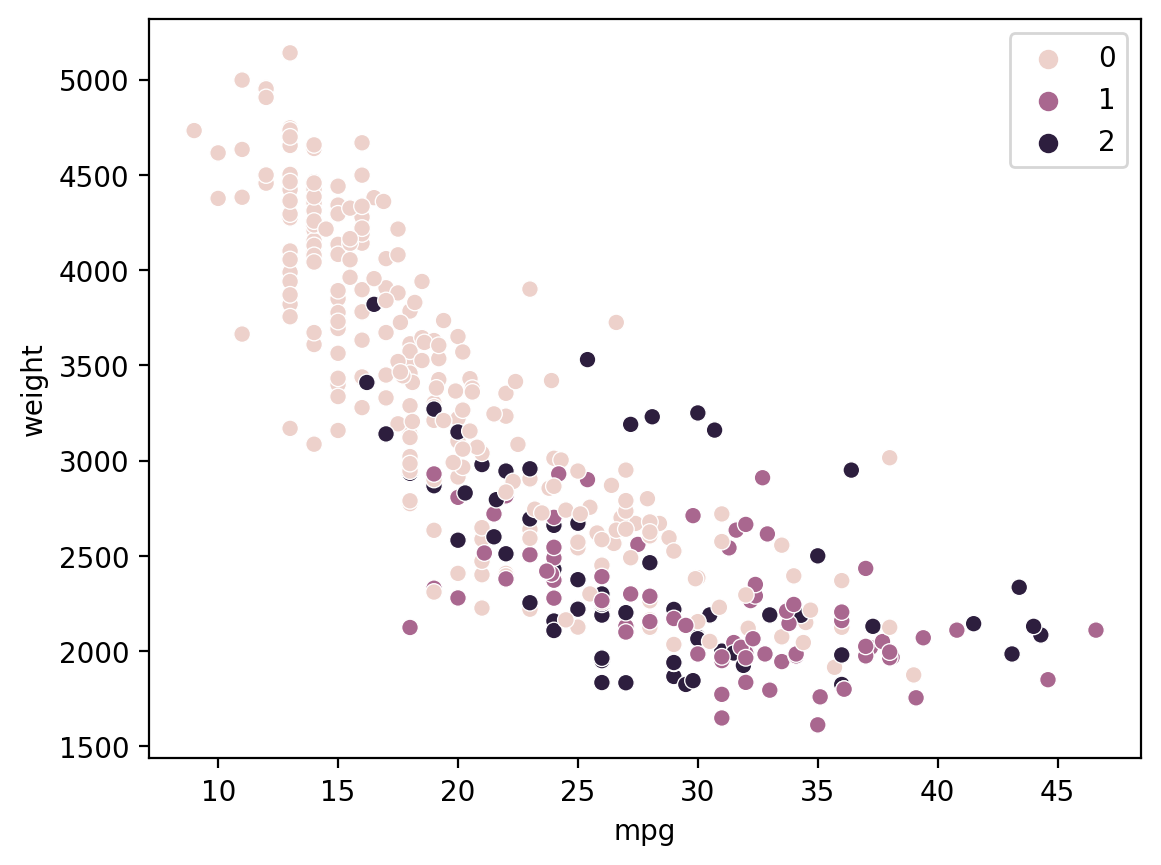

In [42]:
plt.figure(dpi=200)
sns.scatterplot(data=df,x='mpg', y='weight', hue=cluster_labels)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

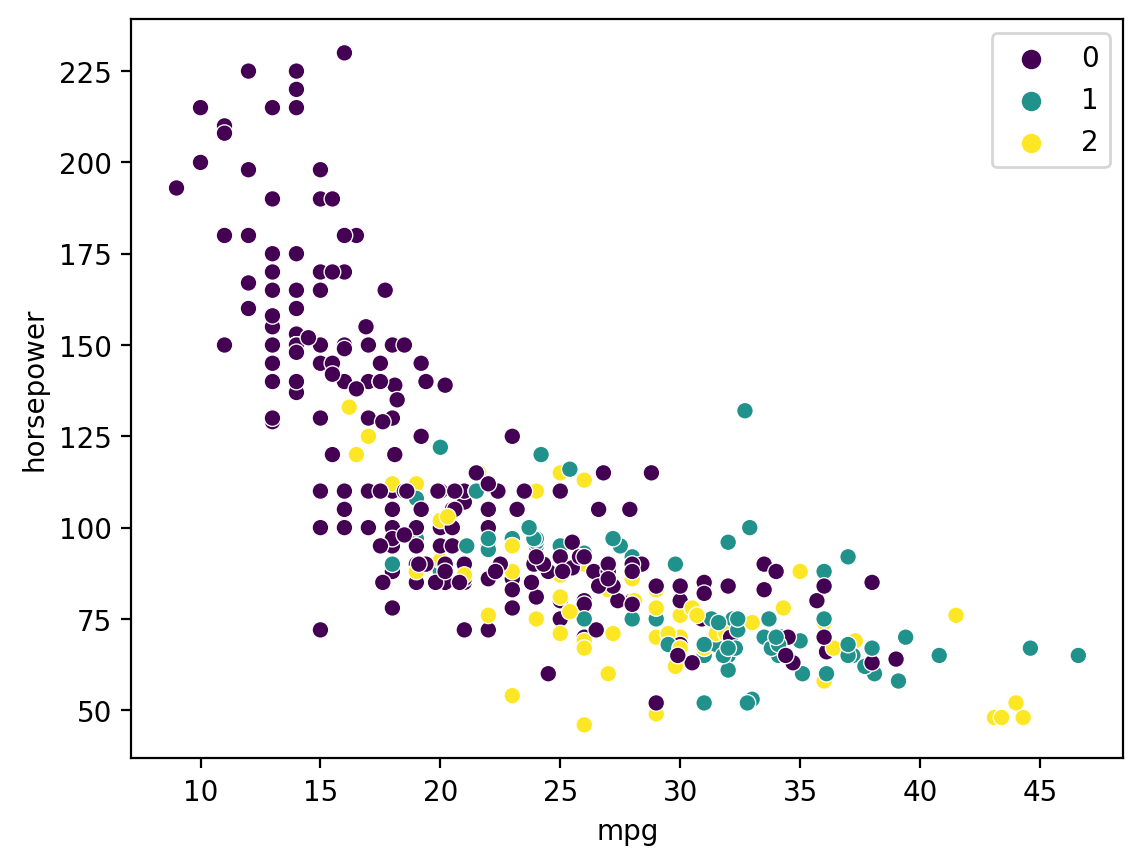

In [43]:
plt.figure(dpi=200)
sns.scatterplot(data=df,x='mpg', y='horsepower', hue=cluster_labels, palette='viridis')

In [44]:
# Максимальное расстояние между двумя точками: sqrt(N_features (кол-ва признаков))

In [45]:
len(scaled_df.columns)

10

In [46]:
np.sqrt(10) # Максимальное расстояние между точками 

3.1622776601683795

In [77]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2)

In [78]:
cluster_labels = model.fit_predict(scaled_df)

In [79]:
cluster_labels # Каждый кластер состоит из одной точки, т. к. distance_threshold=0

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

<font size = 5> Это чем-то похоже на то, как если бы мы в Kmeans clustering, но увеличили бы кол-во кластеров до кол-ва отдельных точек.

In [80]:
from scipy.cluster.hierarchy import dendrogram # Позволит автоматически построить визуальный график 
# на основе Linkege matrix 

In [81]:
from scipy.cluster import hierarchy

In [82]:
linkage_matrix = hierarchy.linkage(model.children_)

In [83]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

<font size = 5> Что означает эта матрица - Смотрим на первую строку этой матрицы. В первых двух колонках указаны номера пары кластеров. В третьей колонке указанно расстояние между этими двумя кластерами. И в 4-ой колонке указанно кол-во точек в этих двух кластерах. В самом конце видим число 391 - кол-во точек минус 1. По сути эта матрица содержит числовые данные, чтобы на их основе нарисовать дендраграмму.

<font size = 5> Метод усечения lastp - по кол-ву кластеров

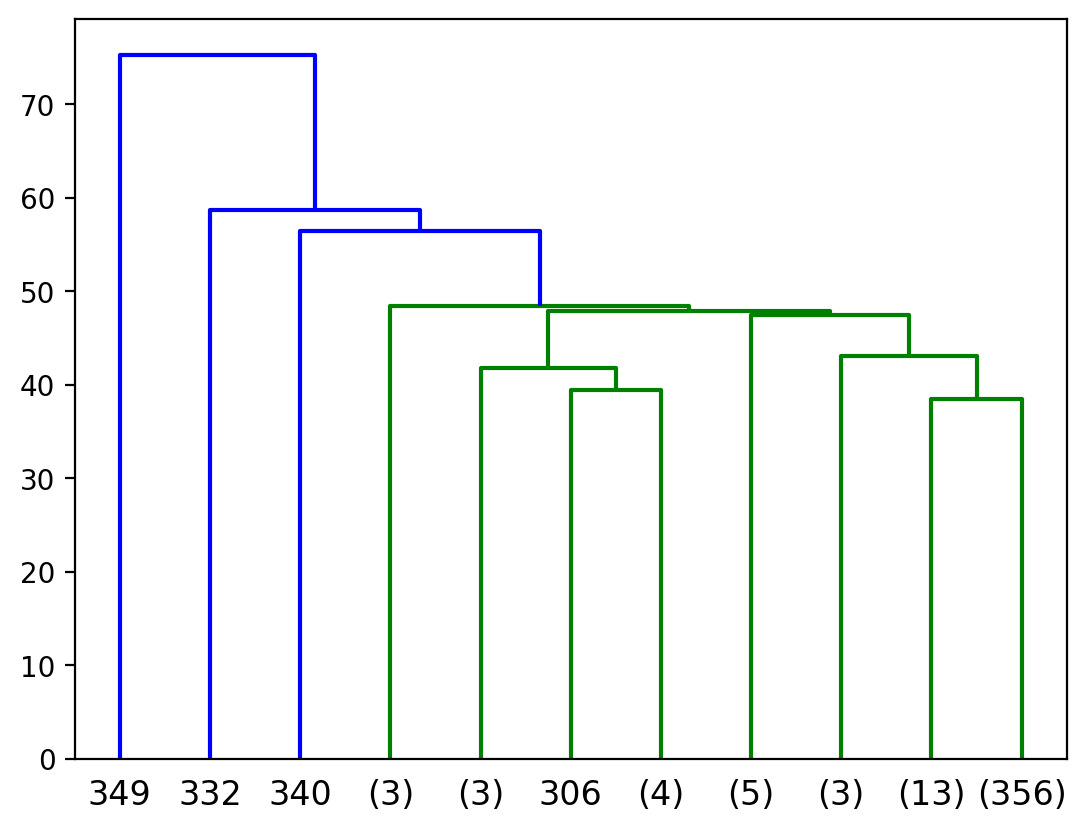

In [84]:
plt.figure(dpi=200)
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=11)
# Объединяем 10 кластеров в иерархию и останавливаемся

<font size = 5> Так мы получаем лишь усеченную картину. Также значения по оси X не всегда могут бытб легко интерпретированы. По оси X могут указываться не только номера исходныз кластеро, но и те кластеры, которые получились в результате иерархического объединения кластеров. Для понимания понадобится linkage matrix чтобы посмотреть из чего состоят эти объединения. 
    

<font size = 5> Метод усечения level - по уровню

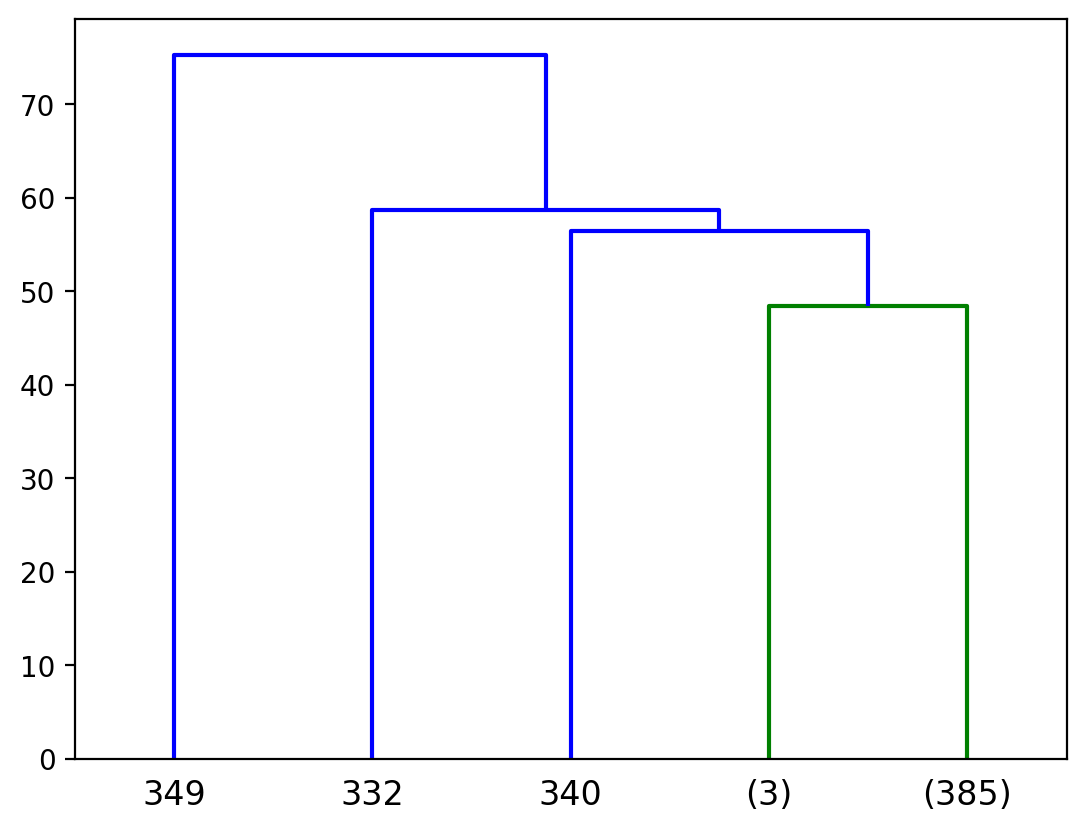

In [59]:
plt.figure(dpi=200)
dendro = dendrogram(linkage_matrix, truncate_mode='level', p=3)
# Объединяем 10 кластеров в иерархию и останавливаемся

<font size = 5> Итак, с помощью параметра **truncate_mode** можно построить небольшую часть иерархии и на основе полученного графика решить, можем ли мы остановиться в построении иерархии на каком-то кол-ве кластеров. Также можно заметить, что разные кластеры рисуются разным цветом. Это еще один метод, по которому scipy пытается помочь в выборе кол-ва кластеров. Для этого есть параметр **color_threshold**, с помощью которого можно указать, как будет использоваться цвет для расскраски кластеров.<br><br> Есть еще один способ определенния кол-ва кластеров - постараться интепретировать Евклидово расстояние.

In [60]:
scaled_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
# Максимально возможное расстояние 

np.sqrt(len(scaled_df.columns))

3.1622776601683795

In [66]:
scaled_df['mpg'].idxmax()

320

In [67]:
scaled_df['mpg'].idxmin()

28

<font size = 5> Вычислим Евклидово расстояние

In [72]:
car_a = scaled_df.iloc[320]

In [73]:
car_b = scaled_df.iloc[28]

In [75]:
distance = np.linalg.norm(car_a-car_b)

In [76]:
distance

2.3852929970374714

<font size = 5> Расстояние для точек и расстояние для кластеров совсем не одно и то же. Расстояние для кластеров может быть существенно больше